[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/stfc/janus-core/blob/main/docs/source/tutorials/cli/neb.ipynb)

# Nudge Elastic Band

`janus-core` contains various machine learnt interatomic potentials (MLIPs), including MACE based models (MACE-MP, MACE-OFF), CHGNet, SevenNet and more, full list on https://github.com/stfc/janus-core.

Other will be added as their utility is proven beyond a specific material.

## Aim

We showcase the use of NEB with janus and MLIPs by stuing Ethanol oxidation reactions catalyzed by water molecules, the full study was carried out in this paper Chemical Physics Letters 363 (2002) 80–86

https://doi.org/10.1016/S0009-2614(02)01142-9

## Set up environment (optional)

These steps are required for Google Colab, but may work on other systems too:

In [ ]:
# import locale
# locale.getpreferredencoding = lambda: "UTF-8"

# ! pip uninstall torch torchaudio torchvision numpy -y
# ! uv pip install janus-core[all] data-tutorials torch==2.5.1 --system
# get_ipython().kernel.do_shutdown(restart=True)

Use `data_tutorials` to get the data required for this tutorial:

In [ ]:
from data_tutorials.data import get_data

get_data(
    url="https://raw.githubusercontent.com/stfc/janus-core/main/docs/source/tutorials/data/",
    filename=["ethanol_reactants.extxyz", "ethanol_products.extxyz","ethanol_reactants_1water.extxyz","ethanol_products_1water.extxyz","ethanol_reactants_2water.extxyz","ethanol_products_2water.extxyz"],
    folder="../data",
)

## Command-line help and options

Once `janus-core` is installed, the `janus` CLI command should be available:

In [1]:
! janus neb --help

                                                                                
 Usage: janus neb [OPTIONS]                                                     
                                                                                
 Run Nudged Elastic Band method.                                                
                                                                                
╭─ Options ────────────────────────────────────────────────────────────────────╮
│ --init-struct                           PATH              [default: None]    │
│ --final-struct                          PATH              [default: None]    │
│ --band-structs                          PATH              [default: None]    │
│ --neb-class                             TEXT              Name of ASE NEB    │
│                                                           class to use.      │
│                                                           [default: NEB]     │
│ --n-images                

## run a simple Nudge Elastic Bands

### 0 water molecules case

In [2]:
%%writefile neb.yml

init_struct: ../data/ethanol_reactants.extxyz
final_struct: ../data/ethanol_products.extxyz
n_images: 11
device: cpu
arch: mace_mp
minimize: True
plot_band: True
write_band: True
calc_kwargs:
      dispersion: True
      model: medium-omat-0
tracker: False

Writing neb.yml


visualise the inputs

In [3]:
from ase.io import read
from weas_widget import WeasWidget

r = read("../data/ethanol_reactants.extxyz")
p = read("../data/ethanol_products.extxyz")

v=WeasWidget()
v.from_ase([r,p])
v.avr.model_style = 1
v.avr.show_hydrogen_bonds = True
v


WeasWidget(children=(BaseWidget(atoms=[{'species': {'H': 'H', 'C': 'C', 'O': 'O'}, 'cell': [0.0, 0.0, 0.0, 0.0…

In [4]:
!janus neb --config neb.yml

/Users/elliottkasoar/Documents/PSDI/janus-core/.venv/lib/python3.12/site-packages/e3nn/o3/_wigner.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  _Jd, _W3j_flat, _W3j_i

In [5]:
!ls janus_results/

ethanol_products-final-opt.extxyz ethanol_reactants-neb-plot.svg
ethanol_reactants-init-opt.extxyz ethanol_reactants-neb-results.dat
ethanol_reactants-neb-band.extxyz ethanol_reactants-neb-summary.yml
ethanol_reactants-neb-log.yml


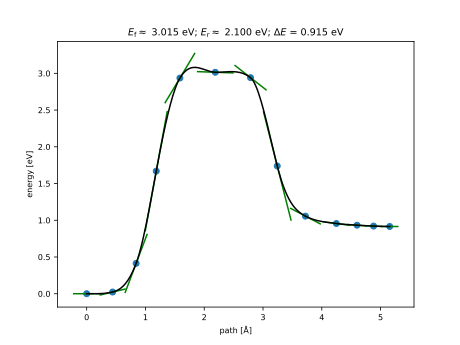

In [6]:
from IPython.display import SVG, display
display(SVG("janus_results/ethanol_reactants-neb-plot.svg"))

In [7]:
nebp = read("janus_results/ethanol_reactants-neb-band.extxyz", index=":")

w=WeasWidget()
w.from_ase(nebp)
w.avr.model_style = 1
w.avr.show_hydrogen_bonds = True
w

WeasWidget(children=(BaseWidget(atoms=[{'species': {'H': 'H', 'C': 'C', 'O': 'O'}, 'cell': [0.0, 0.0, 0.0, 0.0…

is the barrier realistic? compare with the numbers from the paper.

### 1 water molecule

we can use the previous config and just overwrite the init and final structures

In [8]:
! janus neb --config neb.yml --init-struct ../data/ethanol_reactants_1water.extxyz --final-struct ../data/ethanol_products_1water.extxyz

/Users/elliottkasoar/Documents/PSDI/janus-core/.venv/lib/python3.12/site-packages/e3nn/o3/_wigner.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  _Jd, _W3j_flat, _W3j_i

In [9]:
!ls janus_results/

ethanol_products-final-opt.extxyz
ethanol_products_1water-final-opt.extxyz
ethanol_reactants-init-opt.extxyz
ethanol_reactants-neb-band.extxyz
ethanol_reactants-neb-log.yml
ethanol_reactants-neb-plot.svg
ethanol_reactants-neb-results.dat
ethanol_reactants-neb-summary.yml
ethanol_reactants_1water-init-opt.extxyz
ethanol_reactants_1water-neb-band.extxyz
ethanol_reactants_1water-neb-log.yml
ethanol_reactants_1water-neb-plot.svg
ethanol_reactants_1water-neb-results.dat
ethanol_reactants_1water-neb-summary.yml


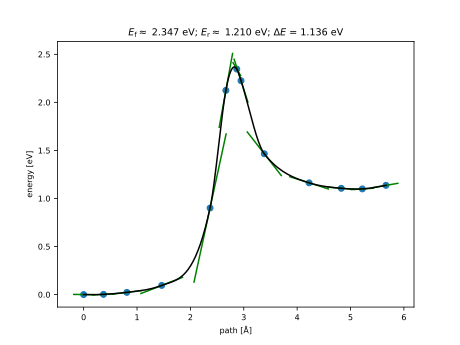

In [10]:
display(SVG("janus_results/ethanol_reactants_1water-neb-plot.svg"))

In [11]:
from ase.io import read
from weas_widget import WeasWidget
nebp = read("janus_results/ethanol_reactants_1water-neb-band.extxyz", index=":")

w1=WeasWidget()
w1.from_ase(nebp)
w1.avr.model_style = 1
w1.avr.show_hydrogen_bonds = True
w1

WeasWidget(children=(BaseWidget(atoms=[{'species': {'C': 'C', 'H': 'H', 'O': 'O'}, 'cell': [0.0, 0.0, 0.0, 0.0…

### 2 water molecules

In [12]:
! janus neb --config neb.yml --init-struct ../data/ethanol_reactants_2water.extxyz --final-struct ../data/ethanol_products_2water.extxyz

/Users/elliottkasoar/Documents/PSDI/janus-core/.venv/lib/python3.12/site-packages/e3nn/o3/_wigner.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  _Jd, _W3j_flat, _W3j_i

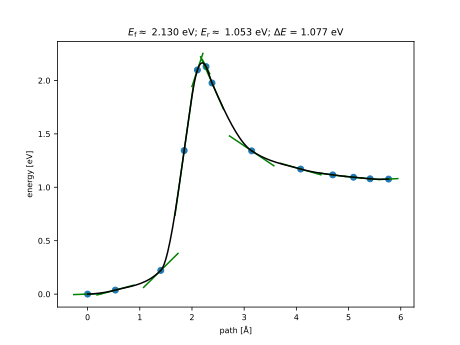

In [13]:
display(SVG("janus_results/ethanol_reactants_2water-neb-plot.svg"))

In [14]:
from ase.io import read
from weas_widget import WeasWidget
nebp = read("janus_results/ethanol_reactants_2water-neb-band.extxyz", index=":")

w2=WeasWidget()
w2.from_ase(nebp)
w2.avr.model_style = 1
w2.avr.show_hydrogen_bonds = True
w2

WeasWidget(children=(BaseWidget(atoms=[{'species': {'C': 'C', 'H': 'H', 'O': 'O'}, 'cell': [0.0, 0.0, 0.0, 0.0…

### extra bits


- analyse the barrier height trend.
- consider redoing the same exercise with a different potential... remember if you use mace-off dispersion needs to be off.
